In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# set print options for pandas
# set column width to 1000
pd.set_option('display.max_colwidth', 10000)  # Deprecated since version 1.0.0: Use None instead of -1.
pd.set_option('display.width', 10000)  # Automatically detect the display width for wrapping.
pd.set_option('display.max_columns', 10000)  # Show all columns.
pd.set_option('display.max_rows', 10000)  # Show all rows.


In [2]:
df = pd.read_csv('./stat/combine_result.csv')
# only keep selected columns
df = df[['Para3', 'app', 'ipc', 'fetch_cycles', 'switch_cycles', 'mispred_cycles', 'miss_cycles', 'redirect_cycles']]
# rename columns Para3 to repl
df = df.rename(columns={'Para3': 'repl'})

# remove repl foo
# df = df[df['repl'] != 'foo']

In [3]:
print(df.head())

         repl              app      ipc  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
0  mockingjay            mysql  1.14331      26556913         117734         5170790     34485702          8089758
1  mockingjay           tomcat  1.14215      25018735         119303        17786379     22122124          8160049
2  mockingjay        cassandra  0.62809      25511976          54080         7693721     27664114          7781150
3  mockingjay  finagle-chirper  1.12952      25054083         125435        18133500     28819743          3845930
4  mockingjay           python  1.35121      23640560         151300        19511388     17556902          3805151


In [4]:
# Define the cycle metrics we are interested in
cycle_metrics = ['fetch_cycles', 'switch_cycles', 'mispred_cycles', 'miss_cycles', 'redirect_cycles']

# For each app, subtract the minimum of each metric
apps = df['app'].unique()
app_dfs = []  # To store adjusted DataFrames for each app
for app in apps:
    app_df = df[df['app'] == app].copy()  # Get the DataFrame for the app
    
    for metric in cycle_metrics:
        min_value = app_df[metric].min()
        app_df[metric] -= min_value  # Subtract the minimum
    app_dfs.append(app_df)

# Combine all the adjusted app DataFrames
adjusted_df = pd.concat(app_dfs)

print(adjusted_df)

             repl              app      ipc  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
0      mockingjay            mysql  1.14331        636787          18885          134478            0              181
10          srrip            mysql  1.14453        511388           3891          124782        14111             4387
20           ship            mysql  1.14419        473131           6785          160196        22039             8048
30          drrip            mysql  1.13163       1831092          29725               0        17159            12821
40           ghrp            mysql  1.14626        380243           1111          142255        14862                0
50            lru            mysql  1.14320        629046           8216           97895         6200             7624
60  DynamicBypass            mysql  1.14869             0              0          204537        22365             2844
1      mockingjay           tomcat  1.14215     

             repl    app      ipc  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
0      mockingjay  mysql  1.14331        636787          18885          134478            0              181
10          srrip  mysql  1.14453        511388           3891          124782        14111             4387
20           ship  mysql  1.14419        473131           6785          160196        22039             8048
30          drrip  mysql  1.13163       1831092          29725               0        17159            12821
40           ghrp  mysql  1.14626        380243           1111          142255        14862                0
50            lru  mysql  1.14320        629046           8216           97895         6200             7624
60  DynamicBypass  mysql  1.14869             0              0          204537        22365             2844
                 app  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
repl                            

/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics

             repl              app      ipc  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
3      mockingjay  finagle-chirper  1.12952        531443          19837          141262            0                0
13          srrip  finagle-chirper  1.13160        469362              0               0        20482             4217
23           ship  finagle-chirper  1.13192        401682          14607           61797        10781             3117
33          drrip  finagle-chirper  1.12694        850329          18935           50131        11088             7177
43           ghrp  finagle-chirper  1.13148        348176           6593          141813        17107             1841
53            lru  finagle-chirper  1.12802        660380           9829           97948        19878             5040
63  DynamicBypass  finagle-chirper  1.13630             0           3884          120708         4293              615
                           app  fetch_cycles  sw

/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics

             repl    app      ipc  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
7      mockingjay  kafka  0.77872        736337           8187          146106        18401             2987
17          srrip  kafka  0.77912        699215            144          148636         2130             1763
27           ship  kafka  0.77993        521753           3042          164938        15602             7329
37          drrip  kafka  0.77643       1604315          19325               0        18219             9667
47           ghrp  kafka  0.78006        496338           2179          189789            0             2596
57            lru  kafka  0.77779        993410           3547           94972        25082                0
67  DynamicBypass  kafka  0.78187             0              0          265894         5071             7286
                 app  fetch_cycles  switch_cycles  mispred_cycles  miss_cycles  redirect_cycles
repl                            

/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_3606533/2007884762.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics

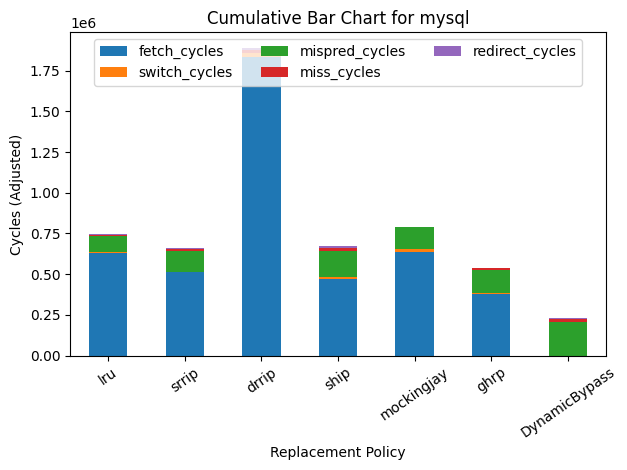

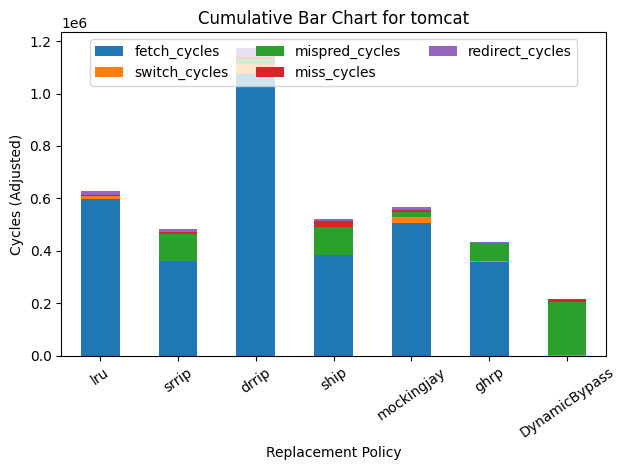

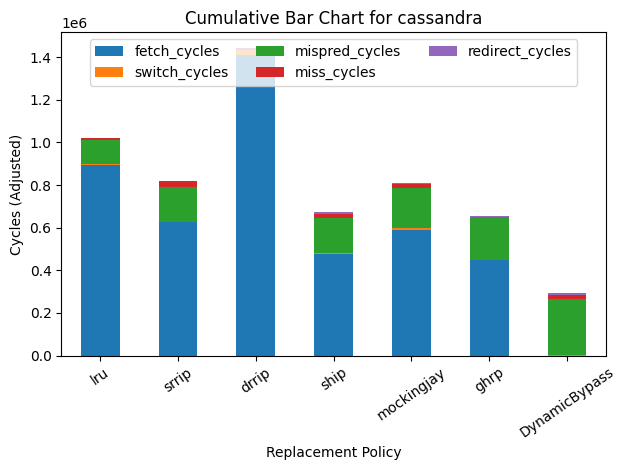

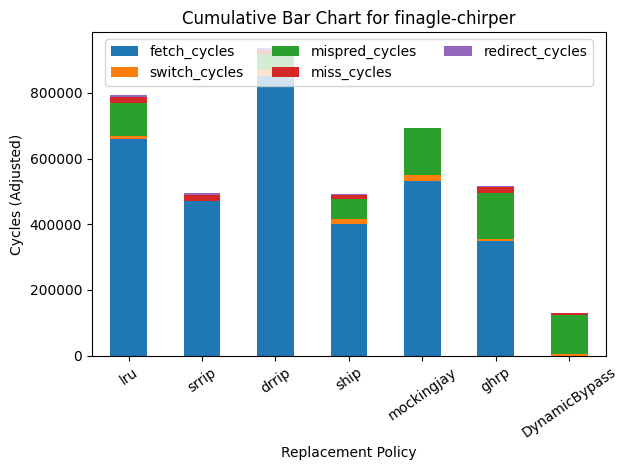

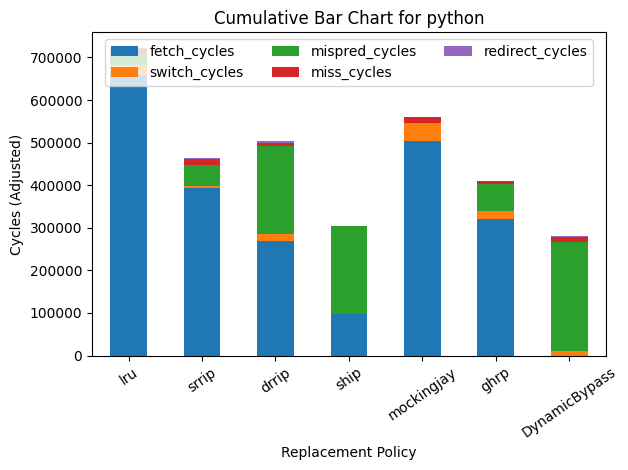

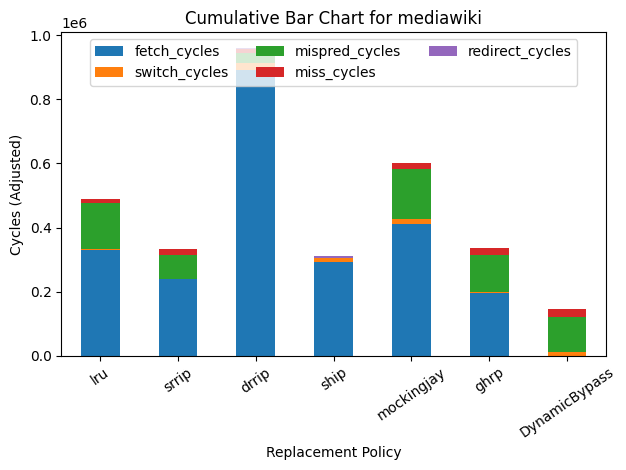

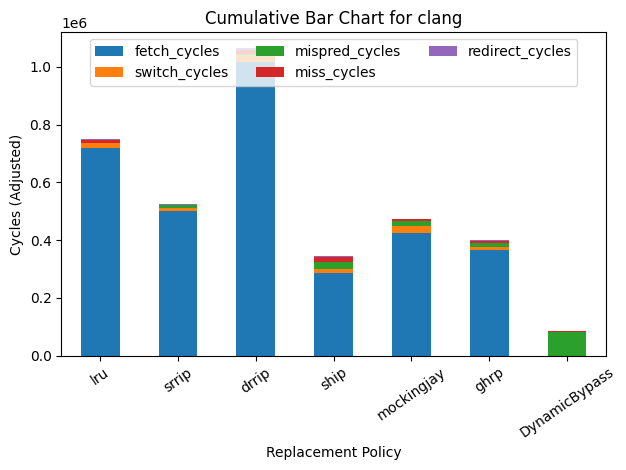

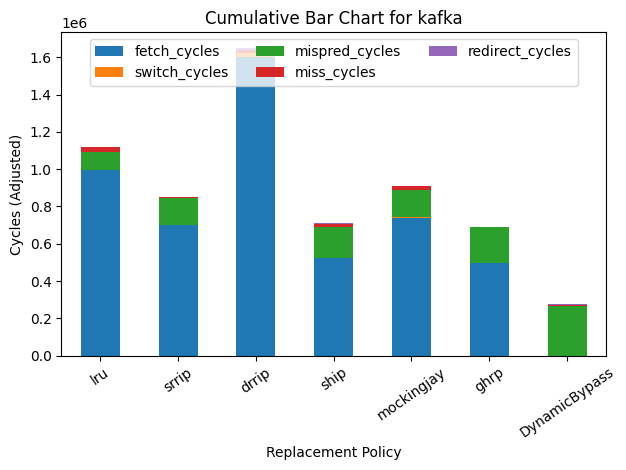

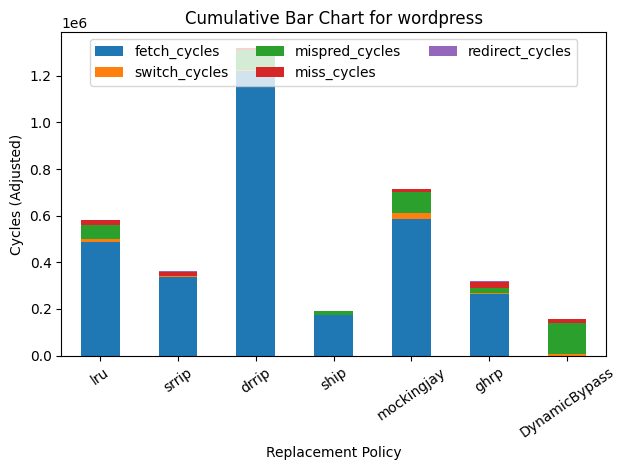

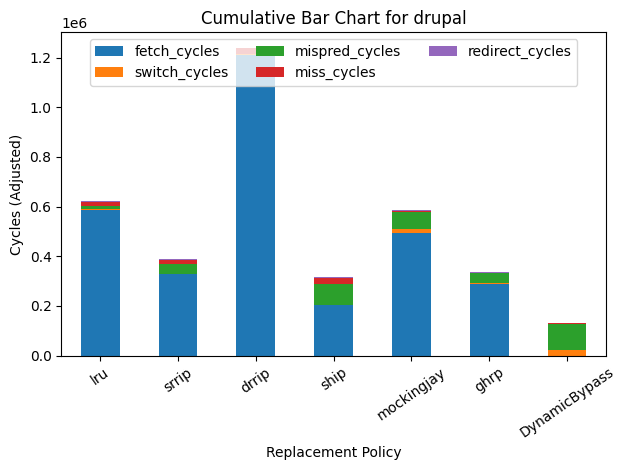

In [5]:
# surpress SettingWithCopyWarning warning and FutureWarning
pd.options.mode.chained_assignment = None  # default='warn'
# surpress FutureWarning
pd.set_option('mode.chained_assignment', None)  # default='warn'
for app in apps:
    app_df = adjusted_df[adjusted_df['app'] == app]
    print(app_df)
    desired_order = ['lru', 'srrip', 'drrip', 'ship', 'mockingjay', 'ghrp', 'thermo', 'DynamicBypass', 'foo']
    app_df['repl'] = pd.Categorical(app_df['repl'], categories=desired_order, ordered=True)
    app_df = app_df.sort_values('repl')
    app_df = app_df.set_index('repl')
    app_df = app_df.drop(columns=['ipc'])
    print(app_df)    
    # Sum the metrics for each 'repl' within the app
    app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
    
    # Create a cumulative bar chart
    app_sum_df_cum = app_sum_df.cumsum(axis=1)
    
    app_df.plot(kind='bar', stacked=True)
    # put title to bottom
    plt.title(f'Cumulative Bar Chart for {app}')
    plt.xlabel('Replacement Policy')
    plt.ylabel('Cycles (Adjusted)')
    # manually set legend location to top center
    plt.legend(loc='upper center', ncol=3)
    # set angle of xticks to 35
    plt.xticks(rotation=35)
    plt.tight_layout()
    # plt.savefig(f'./plot/cycle/{app}_cumulative_bar_chart.png')

In [6]:
app_df_modify = pd.DataFrame()
for app in apps:
    app_df = adjusted_df[adjusted_df['app'] == app]
    # add a column for the sum of all cycle metrics
    app_df['sum'] = app_df[cycle_metrics].sum(axis=1)
    app_df['sum_without_mispred'] = app_df[['fetch_cycles', 'switch_cycles', 'miss_cycles', 'redirect_cycles']].sum(axis=1)
    # only keep the repl and sum and ipc columns
    app_df = app_df[['repl','app', 'ipc', 'sum', 'sum_without_mispred']]

    lru_ipc = app_df[app_df['repl'] == 'lru']['ipc'].values[0]
    app_df['ipc'] = app_df['ipc'] / lru_ipc -1
    
    lru_cycle = 90000000 / lru_ipc
    lru_sum = app_df[app_df['repl'] == 'lru']['sum'].values[0]
    app_df['sum'] = - (app_df['sum'] - lru_sum) / lru_cycle
    
    lru_sum_without_mispred = app_df[app_df['repl'] == 'lru']['sum_without_mispred'].values[0]
    app_df['sum_without_mispred'] = - (app_df['sum_without_mispred'] - lru_sum_without_mispred) / lru_cycle
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    X = app_df['sum'].values.reshape(-1, 1)
    y = app_df['ipc'].values
    model.fit(X, y)
    
    # predict ipc_without_mispred using sum_without_mispred
    X_without_mispred = app_df['sum_without_mispred'].values.reshape(-1, 1)
    y_without_mispred = model.predict(X_without_mispred)
    app_df['ipc_without_mispred'] = y_without_mispred
    
    print(app_df)
    # concat app_df to app_df_modify
    app_df_modify = pd.concat([app_df_modify, app_df])

# group by repl and calculate the mean of ipc and ipc_without_mispred for each repl
app_df_modify = app_df_modify.groupby('repl')[['ipc', 'ipc_without_mispred']].mean()
print(app_df_modify)

             repl    app       ipc       sum  sum_without_mispred  ipc_without_mispred
0      mockingjay  mysql  0.000096 -0.000525            -0.000061             0.000252
10          srrip  mysql  0.001163  0.001149             0.001490             0.001363
20           ship  mysql  0.000866  0.001001             0.001792             0.001580
30          drrip  mysql -0.010121 -0.014504            -0.015747            -0.010985
40           ghrp  mysql  0.002677  0.002674             0.003237             0.002615
50            lru  mysql  0.000000  0.000000             0.000000             0.000296
60  DynamicBypass  mysql  0.004802  0.006595             0.007950             0.005991
             repl     app       ipc       sum  sum_without_mispred  ipc_without_mispred
1      mockingjay  tomcat  0.000543  0.000773             0.001040             0.000628
11          srrip  tomcat  0.001288  0.001863             0.003169             0.002331
21           ship  tomcat  0.000955  0.0